In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
import transformers
from transformers import BertModel,BertTokenizer,AdamW,get_linear_schedule_with_warmup
import torch
from torch import nn 
from torch.utils.data import Dataset,DataLoader
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

e:\NLP-Sentiment-Analysis\.venv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [12]:
df = pd.read_csv('E:\\NLP-Sentiment-Analysis\\reviews.csv')
df.head()

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,sortOrder,appId
0,gp:AOqpTOEhZuqSqqWnaKRgv-9ABYdajFUB0WugPGh-SG-...,Eric Tie,https://play-lh.googleusercontent.com/a-/AOh14...,I cannot open the app anymore,1,0,5.4.0.6,10/27/2020 21:24,NaN,NaN,newest,com.anydo
1,gp:AOqpTOH0WP4IQKBZ2LrdNmFy_YmpPCVrV3diEU9KGm3...,john alpha,https://play-lh.googleusercontent.com/a-/AOh14...,I have been begging for a refund from this app...,1,0,NaN,10/27/2020 14:03,"Please note that from checking our records, yo...",10/27/2020 15:05,newest,com.anydo
2,gp:AOqpTOEMCkJB8Iq1p-r9dPwnSYadA5BkPWTf32Z1azu...,Sudhakar .S,https://play-lh.googleusercontent.com/a-/AOh14...,Very costly for the premium version (approx In...,1,0,NaN,10/27/2020 8:18,NaN,NaN,newest,com.anydo
3,gp:AOqpTOGFrUWuKGycpje8kszj3uwHN6tU_fd4gLVFy9z...,SKGflorida@bellsouth.net DAVID S,https://play-lh.googleusercontent.com/-75aK0WF...,"Used to keep me organized, but all the 2020 UP...",1,0,NaN,10/26/2020 13:28,What do you find troublesome about the update?...,10/26/2020 14:58,newest,com.anydo
4,gp:AOqpTOHls7DW8wmDFzTkHwxuqFkdNQtKHmO6Pt9jhZE...,Louann Stoker,https://play-lh.googleusercontent.com/-pBcY_Z-...,Dan Birthday Oct 28,1,0,5.6.0.7,10/26/2020 6:10,NaN,NaN,newest,com.anydo


In [20]:
df = df.iloc[:,3:5]
df

,content,score
0,I cannot open the app anymore,1
1,I have been begging for a refund from this app...,1
2,Very costly for the premium version (approx In...,1
3,"Used to keep me organized, but all the 2020 UP...",1
4,Dan Birthday Oct 28,1
...,...,...
12490,"I really like the planner, it helps me achieve...",5
12491,😁****😁,5
12492,Very useful apps. You must try it,5
12493,Would pay for this if there were even more add...,5


<Axes: xlabel='score', ylabel='count'>

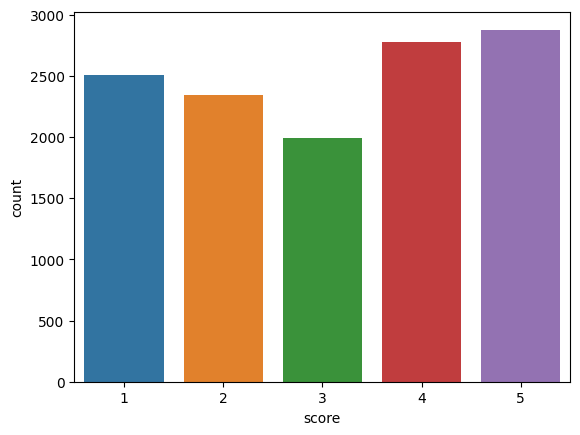

In [21]:
sns.countplot(x=df.score)

In [22]:
def to_emotion(score):
    if(score<=2):
        return 0 
    elif(score==3):
        return 1
    else:
        return 2
df['emotions'] = df.score.apply(to_emotion)


<Axes: xlabel='emotions', ylabel='count'>

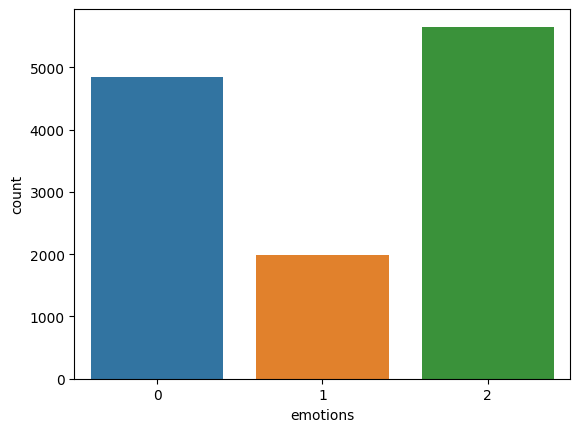

In [24]:
sns.countplot(x=df['emotions'])